<a href="https://colab.research.google.com/github/JijiSK/demo/blob/main/us_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents-analysis')


     |████████████████████████████████| 68 kB 994 kB/s 


# US Accidents Exploratory Data Analysis

This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is continuously being collected from February 2016, using several data providers, including multiple APIs that provide streaming traffic event data. 
 - Data has taken from kaggle
 - Currently, there are about 1.5 million accident records in this dataset 
 - can be usful to prevent accidents.
 - have choosen Columns State,City ,Start_time to understand about the accidents


In [ ]:
pip install opendatasets --upgrade --quiet

### Download the data

In [ ]:
import opendatasets as od

dwn_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(dwn_url)


Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [ ]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation and Cleaning
- Read the file using pandas
- look at some information about the data and columns
- fix any missing or incorrect values 


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df.head(1)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.23,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

- it has 2845342 rows and 47 columns

In [ ]:
df.describe()




,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01



**Percentage of Missing values per column**

In [ ]:
missing_percentage = (df.isna().sum().sort_values(ascending = False) )/ len(df)
missing_percentage

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

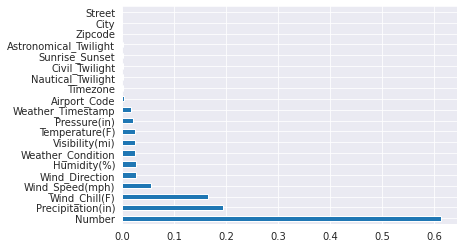

In [ ]:
missing_percentage[missing_percentage != 0].plot(kind='barh')

# **Exploratory Anaysis and visualization:**


In [ ]:
df.columns


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# **What need to study from the given dataset**


*   From the column Start_Time, can study what is the peak time of accidents, which year/month/weekday its high.
*   From the column City,State its easy to learn which city and state has the highest number of accidents occures.

columns which we will analyse

'State','City','Start_Time','Start_Lat','Start_Lng',




In [ ]:
!pip install pytz --quiet

In [ ]:
from pytz import timezone
from datetime import datetime
time_format = '%Y-%m%d %H:%M:%S %Z%z'


In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Start_Time column Study

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


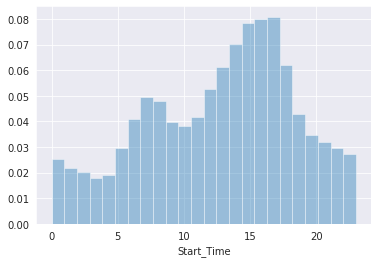

In [ ]:
sns.distplot(df.Start_Time.dt.hour,bins =24 ,kde=False,norm_hist=True)

From the below plots we could learn whether the distribution of accidents by hour the same on weekends as on week days

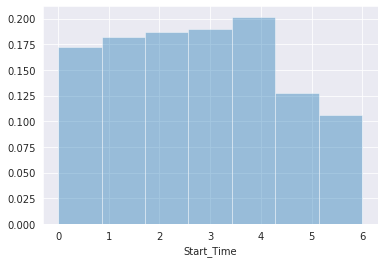

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek,bins =7 ,kde=False,norm_hist=True)

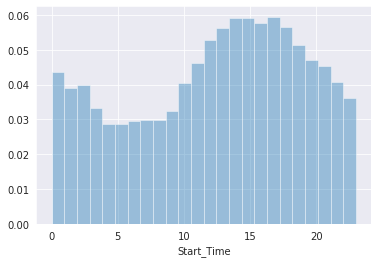

In [ ]:
Sundays_start_time= df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(Sundays_start_time.dt.hour,bins =24 ,kde=False,norm_hist=True)

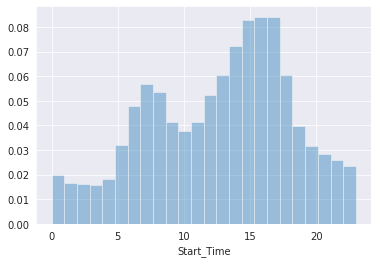

In [ ]:
Monday_start_time= df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(Monday_start_time.dt.hour,bins =24 ,kde=False,norm_hist=True)

The above two histogram shows that weekends the day time accidnets are lower than mondays . On weekdays the accidents are prompt in between 7 and 9 and between 2 - 6pm.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


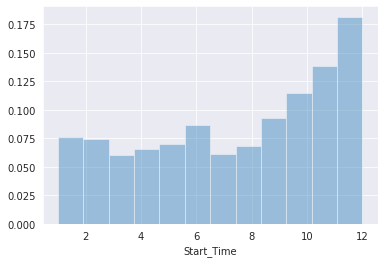

In [ ]:

sns.distplot(df.Start_Time.dt.month,bins =12 ,kde=False,norm_hist=True)

Accidents are high towards the end of the year. But the data seems not complete as in the data the details of Jan 2016 is missing.But over all its shows that over summer the accidents are bit low. which implies the whether condition probaply bad.

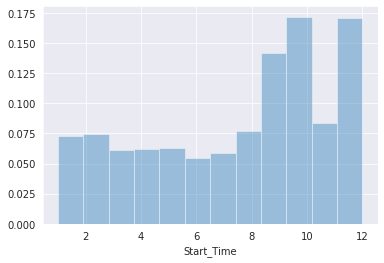

In [ ]:
df_2019 = df[df.Start_Time.dt.year == 2019]

sns.distplot(df_2019.Start_Time.dt.month,bins =12 ,kde=False,norm_hist=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


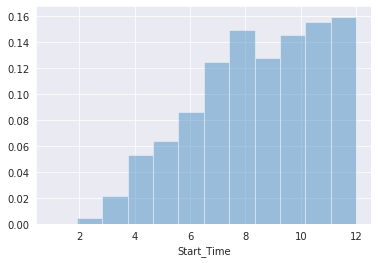

In [ ]:
df_2016 = df[df.Start_Time.dt.year == 2016]

sns.distplot(df_2016.Start_Time.dt.month,bins =12 ,kde=False,norm_hist=True)

Year wise comparison shows some problem with the data like missing values.

## State and City column Study

In [ ]:
State_City =pd.DataFrame(df[['State','City']]).value_counts().to_frame()
State_City

0
State City                 
FL    Miami          106896
CA    Los Angeles     68956
FL    Orlando         54654
TX    Dallas          41615
      Houston         39366
...                     ...
PA    Holbrook            1
      Honesdale           1
MI    Norton Shores       1
      North Star          1
WY    Worland             1

[16930 rows x 1 columns]

In [ ]:
State_City.rename(columns = {'City':'City','City':'City',0:'Accd_cnt'}, inplace = True)

In [ ]:
State_City

Accd_cnt
State City                   
FL    Miami            106896
CA    Los Angeles       68956
FL    Orlando           54654
TX    Dallas            41615
      Houston           39366
...                       ...
PA    Holbrook              1
      Honesdale             1
MI    Norton Shores         1
      North Star            1
WY    Worland               1

[16930 rows x 1 columns]

In [ ]:
State_city_High_Accd=State_City[State_City.Accd_cnt >=15000]

In [ ]:
State_city_High_Accd.describe()

,Accd_cnt
count,18.000000
mean,32868.944444
std,23586.377548
min,15614.000000
25%,17991.500000
50%,22802.500000
75%,37774.000000
max,106896.000000


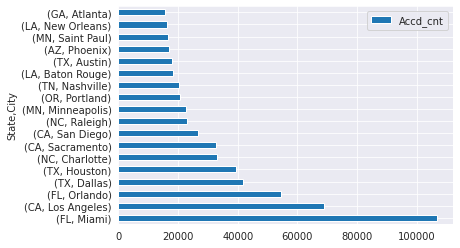

In [ ]:
State_city_High_Accd.plot(kind='barh')



* **The high accident occure State is FL and City is Miami**




In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_style("darkgrid")

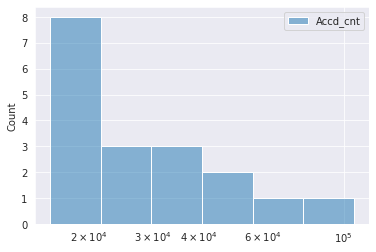

In [ ]:
sns.histplot(State_city_High_Accd, log_scale = True)

In [ ]:
'New York'in df.City

False

In [ ]:
'NY' in df.State

False

There is no data for NewYork in this Dataset

## Summary and Conclusion 

Insights :

*   No data for New york
*   The high accident occure State is FL and City is Miami
*   less than 5% of cities have more than 1000 accidents in the year
*   over 4000 cities the cound of accident shows less than 10(need to investigate)
*   high % of accidents occures between 6 am and 8 pm (propably the working time)
*   Histogram plots shows that weekends the day time accidnets are lower than mondays . On weekdays the accidents are prompt in between 7 and 9 and between 2 - 6pm
*  Accidents are high towards the end of the year. But the data seems not complete as in the data the details of Jan 2016 is missing.But over all its shows that over summer the accidents are bit low. which implies the whether condition probaply bad.
*  year wise comparison shows some problem with the data like missing values.



In [311]:
import jovian

In [314]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
